<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python Packaging

### The Basics

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://tpq.io'>http://tpq.io</a> | <a href='mailto:training@tpq.io'>training@tpq.io</a>

## Agenda

* Import system and package structure
* Installation of a package
* Distribution of a package via PyPI

## Import System and Package Structure

Python's import system is explained here https://docs.python.org/3/reference/import.html. We illustrate it on the basis of a really simple example and a more complex one.

### Simple Package Example

The simple "package" consists of three main files. One file `mod.py` on the highest level and one file in each of the two sub-folders.

In [ ]:
!tree pylib

The files are all simple and short ...

In [ ]:
!cat pylib/mod.py

In [ ]:
!cat pylib/suba/two.py

In [ ]:
!cat pylib/subb/three.py

The `__init__.py` files in the folders:

In [ ]:
!cat pylib/__init__.py

In [ ]:
!cat pylib/suba/__init__.py

In [ ]:
!cat pylib/subb/__init__.py

This packaging structure allows us to do the usual imports.

In [ ]:
import pylib

In [ ]:
pylib.mod.one(10)

In [ ]:
pylib.suba.two(20)

In [ ]:
pylib.subb.three(30)

Star import is also possible.

In [ ]:
from pylib import *

In [ ]:
one(100)

In [ ]:
two(50)

In [ ]:
three(33 + 1/3)

### Packaging DX Analytics

This example is based on DX Analytics (see http://dx-analytics.com and http://github.com/yhilpisch/dx). The structure:

In [1]:
!tree dx/dx

dx/dx
├── __init__.py
├── analytical
│   ├── __init__.py
│   ├── black_scholes_merton.py
│   ├── jump_diffusion.py
│   ├── stoch_vol_jump_diffusion.py
│   └── stochastic_volatility.py
├── frame.py
├── license_agpl_3_0.txt
├── models
│   ├── __init__.py
│   ├── geometric_brownian_motion.py
│   ├── jump_diffusion.py
│   ├── mean_reverting_diffusion.py
│   ├── sabr_stochastic_volatility.py
│   ├── simulation_class.py
│   ├── square_root_diffusion.py
│   ├── square_root_jump_diffusion.py
│   ├── stoch_vol_jump_diffusion.py
│   └── stochastic_volatility.py
├── plot.py
├── portfolio.py
├── rates.py
└── valuation
    ├── __init__.py
    ├── derivatives_portfolio.py
    ├── multi_risk.py
    ├── parallel_valuation.py
    ├── single_risk.py
    └── var_portfolio.py

3 directories, 27 files


Let us have a look at two `__init__.py` files. First, the one in sub-folder (sub-package) `simulation`.

In [2]:
!cat dx/dx/valuation/__init__.py

#
# DX Analytics
# Financial Analytics Library
#
# DX Analytics is a financial analytics library, mainly for
# derviatives modeling and pricing by Monte Carlo simulation
#
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as
# published by the Free Software Foundation, either version 3 of the
# License, or any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Affero General Public License for more details.
#
# You should have received a copy of the GNU Affero General Public License
# along with this program. If not, see http://www.gnu.org/licenses/.
#
from .single_risk import *
from .multi_risk import *
from .parallel_valuation import *
from .derivatives_portfolio import *
from .var_port

Second, the top level one.

In [3]:
!cat dx/dx/__init__.py

#
# DX Analytics
# Financial Analytics Library
#
# DX Analytics is a financial analytics library, mainly for
# derviatives modeling and pricing by Monte Carlo simulation
#
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as
# published by the Free Software Foundation, either version 3 of the
# License, or any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Affero General Public License for more details.
#
# You should have received a copy of the GNU Affero General Public License
# along with this program. If not, see http://www.gnu.org/licenses/.
#
from .frame import *
from .models import *
from .valuation import *
from .analytical import *
from .portfolio import *
from .plot import *

This structure yields the desired behaviour for such a Python package. We start by defining a constant discount rate.

In [4]:
cd dx

/Users/yves/Dropbox/Program/skills/04_pack/dx


In [5]:
import dx

In [6]:
sr = dx.constant_short_rate('sr', 0.05)

Second, a market environment for a risk factor.

In [17]:
me = dx.market_environment('me', dx.dt.datetime.now())

In [18]:
me.add_constant('initial_value', 100.)
me.add_constant('volatility', 0.2)
me.add_constant('intial_date', me.pricing_date)
me.add_constant('final_date', dx.dt.datetime(2019, 1, 31))
me.add_curve('discount_curve', sr)
me.add_constant('currency', 'EUR')
me.add_constant('frequency', 'W')
me.add_constant('paths', 100)

Third, the risk factor model itself.

In [19]:
gbm = dx.geometric_brownian_motion('gbm', me)

In [20]:
gbm.get_instrument_values()[:, :3]

array([[100.        , 100.        , 100.        ],
       [106.16851902, 102.55094312,  95.82230687],
       [105.1029259 , 100.99503821, 101.1205988 ],
       [107.81193652, 100.54022092,  98.45250814],
       [104.63559526,  96.96948485, 100.55749877],
       [102.49403074,  97.0634257 ,  97.05801351],
       [103.74781008,  93.05005728,  99.16475784],
       [101.22239946,  90.27157432,  95.32345877],
       [ 96.55615922,  90.15310957,  99.43905215],
       [ 96.70160148,  92.30093265, 100.10222413],
       [ 96.36838783,  95.94409107, 101.36437748],
       [103.45674711,  95.52324597, 101.95337541],
       [106.90627472,  94.78461152,  99.32934544],
       [106.20290515,  97.49250603,  96.02069834],
       [102.24602952,  98.85510398,  96.34457018],
       [ 98.45743558, 100.25288749,  96.49517579],
       [ 98.86169272, 100.26959322,  94.78646045],
       [ 96.28897922,  91.9951235 ,  99.50105754],
       [ 93.89392703,  90.55141423, 101.81226417],
       [ 93.98324365,  88.08448

Some paths visualized.

In [21]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

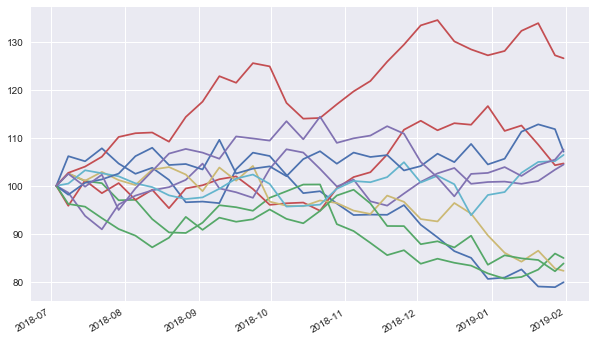

In [22]:
dx.pd.DataFrame(gbm.instrument_values[:, :10], index=gbm.time_grid).plot(
                figsize=(10, 6), legend=False);

In [40]:
!rm -rf dx

## Installation

Writing a `setup.py` script is explained here https://docs.python.org/3/distutils/setupscript.html. For our little example, such a script might look like:

In [23]:
!cat setup.py

#!/usr/bin/env python

from setuptools import setup, find_packages

DISTNAME = 'dx'

setup(name=DISTNAME,
        version='0.1',
        packages=find_packages(include=['dx', 'dx.*']),
        description='DX Analytics',
        author='Dr. Yves Hilpisch',
        author_email='dx@tpq.io',
        url='http://dx-analytics.com/')


A standard tool for installing Python packages is `pip`. See the official documentation under https://packaging.python.org/installing/#use-pip-for-installing.

## Distribution

Once you have finished your project you might want to share it with the world. The means to this end is the `Python Packing Index (PyPI)`. See the **Python Packaging User Guide** under https://packaging.python.org/.

You can register an account for the test `PyPI` server under https://test.pypi.org/account/register/. You need to verify your email address before uploading any packages. For more details on Test `PyPI`, see https://packaging.python.org/guides/using-testpypi/.

The files for our project would look like follows.

In [35]:
cd ..

/Users/yves/Dropbox/Program/skills


In [38]:
!cat setup.cfg

[metadata]
description-file = README.md


In [39]:
!cat README.md

# pylib Tools & Skills

This is the rather simplistic example from the Tools & Skills class of The Python Quants.

## Package

The package contains a total of three simple Python files, two of which are in sub-folders/sub-packages, with a single function each.

## Copyright

The material is copyright (c) Yves Hilpisch. MIT License.


Now make sure to have the **required tools** installed (see https://packaging.python.org/tutorials/packaging-projects/):

    pip install --upgrade setuptools wheel

Then run this command in the package directory (where `setup.py` is located) to **build** the files required for distribution:

    python setup.py sdist bdist_wheel

This builds the distribution files and stores them in the current location.

Next, install `Twine`:

    pip install --upgrade twine

After the build is successful and `Twine` is installed, execute:

    twine upload --repository-url https://test.pypi.org/legacy/ dist/*

You will be prompted for you username and password from the registration.

If everything is successful, you can afterwards **install the package** from the test `PyPI` server via

    pip install --index-url https://test.pypi.org/simple/ pylib

## Conclusions

In conclusion, we can state the following:

* larger projects should be structured as packages
* these are then easily installed via a `setup.py` script
* uploading packages to the Python Packaging Index for sharing "with the world" is generally straightfoward

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>